In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
RANDOM_SEED = 2022

In [41]:
df_5game = pd.read_csv('/content/drive/MyDrive/KBL Prediction/dataset/recent_avg_record_5game.csv')

In [42]:
df_5game

,Unnamed: 0,gmkey,tcode,score,loss,benchScoreCn,bf,bs,defr,dk,...,tf,tfb,threep,threepA,to,tto,turnoverScoreCn,wft,woft,stl
0,0,S17G01N1,70,86,99,0.0,0.0,4.2,17.0,1.8,...,0.0,1.8,10.4,24.0,11.6,0.6,0.0,10.6,9.4,6.4
1,1,S17G01N1,10,99,86,0.0,0.2,5.2,21.8,2.6,...,0.4,4.4,5.2,15.6,9.6,0.2,0.0,9.8,11.4,7.2
2,2,S17G01N2,65,86,88,0.0,0.0,1.6,23.6,1.2,...,0.2,3.6,5.8,16.0,13.2,1.2,0.0,8.8,11.6,5.6
3,3,S17G01N2,35,88,86,0.0,0.0,3.0,23.6,2.2,...,0.2,4.0,6.2,17.4,14.4,1.0,0.0,9.0,10.6,6.8
4,4,S17G01N3,60,67,71,0.0,0.0,1.8,15.6,2.6,...,0.6,4.0,9.2,23.8,8.4,0.8,0.0,12.0,12.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290,7290,S40G01N36,68,95,106,14.2,0.0,1.8,23.2,0.0,...,0.0,6.6,9.2,30.8,13.6,0.2,12.8,11.6,10.0,8.4
7291,7291,S40G01N37,18,98,105,15.2,0.0,2.8,24.0,0.0,...,0.0,6.0,10.4,32.4,9.6,0.2,16.4,6.4,10.2,9.0
7292,7292,S40G01N37,19,105,98,32.8,0.0,2.0,29.8,0.0,...,0.0,4.4,7.2,25.2,10.4,1.2,13.6,8.6,8.6,7.6
7293,7293,S40G01N38,24,71,80,26.2,0.0,1.4,27.8,0.0,...,0.2,5.2,6.6,24.2,14.0,0.4,11.6,12.6,9.2,6.8


In [43]:
df_5game['win'] = df_5game['score'] - df_5game['loss']
df_5game.loc[df_5game['score'] > df_5game['loss'], 'win'] = 1
df_5game.loc[df_5game['score'] < df_5game['loss'], 'win'] = 0
X = df_5game.iloc[:, 5:-1]
X.drop(columns=['ef','maxContiScoreCn', 'maxLeadScoreCn', 'playMin', 'playSec', 'scoreHighTimeCn', 'inout', 'inout1', 'idf'], inplace=True)
y = df_5game.iloc[:,-1]

In [44]:
X.columns

Index(['benchScoreCn', 'bf', 'bs', 'defr', 'dk', 'dkA', 'fb', 'fbScoreCn',
       'fg', 'fgA', 'fgt', 'fgtA', 'foul', 'foulout', 'ft', 'ftA', 'gd',
       'offr', 'pp', 'ppA', 'pscore', 'rb', 'secChanceScoreCn', 'ast', 'teamR',
       'tf', 'tfb', 'threep', 'threepA', 'to', 'tto', 'turnoverScoreCn', 'wft',
       'woft', 'stl'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train_scaled

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [47]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [48]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5771076079506511

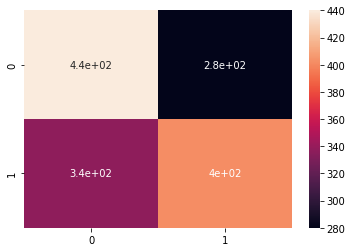

In [49]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [51]:
df_10game = pd.read_csv('/content/drive/MyDrive/KBL Prediction/dataset/recent_avg_record_10game.csv')

In [52]:
df_10game['win'] = df_10game['score'] - df_10game['loss']
df_10game.loc[df_10game['score'] > df_10game['loss'], 'win'] = 1
df_10game.loc[df_10game['score'] < df_10game['loss'], 'win'] = 0
X = df_10game.iloc[:, 5:-1]
X.drop(columns=['ef','maxContiScoreCn', 'maxLeadScoreCn', 'playMin', 'playSec', 'scoreHighTimeCn', 'inout', 'inout1', 'idf'], inplace=True)
y = df_10game.iloc[:,-1]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train_scaled

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [54]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [55]:
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6065989847715736

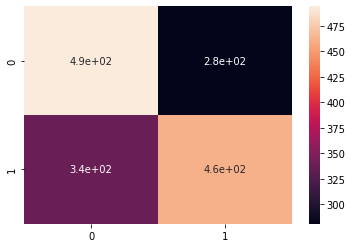

In [56]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [57]:
df_20game = pd.read_csv('/content/drive/MyDrive/KBL Prediction/dataset/recent_avg_record_20game.csv')

In [58]:
df_20game['win'] = df_20game['score'] - df_20game['loss']
df_20game.loc[df_20game['score'] > df_20game['loss'], 'win'] = 1
df_20game.loc[df_20game['score'] < df_20game['loss'], 'win'] = 0
X = df_20game.iloc[:, 5:-1]
X.drop(columns=['ef','maxContiScoreCn', 'maxLeadScoreCn', 'playMin', 'playSec', 'scoreHighTimeCn', 'inout', 'inout1', 'idf'], inplace=True)
y = df_20game.iloc[:,-1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=RANDOM_SEED)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)
X_train_scaled

scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(data=X_test_scaled, columns=X_test.columns)

In [60]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [61]:
y_pred = clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.5901302261823167

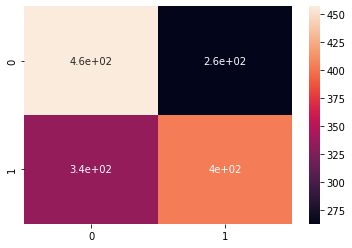

In [62]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)